<a href="https://colab.research.google.com/github/rngiovanna4/EduacationalDataMining/blob/main/MDDesemepnho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Arquivo de código criado para realização de testes ⏳



In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
#Técnicas
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from google.colab import drive
from sklearn.model_selection import RandomizedSearchCV, train_test_split #Função para dividir em traino e teste
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn import metrics #Desse import vem as metricas para validar os resultados
from sklearn.preprocessing import LabelEncoder, LabelBinarizer #Para o pre-processamento
from scipy.stats import randint
#PCA algoritmo para pesquisar / evaluate()

In [ ]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

**Links importantes**

Base utilizada:
https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data

Tutorial de limpeza dos dados:
https://www.datacamp.com/tutorial/tutorial-data-cleaning-tutorial

Tutorial Árvore de Decisão:
https://www.datacamp.com/tutorial/decision-tree-classification-python

###Passos: ✍📊
- Formatar a base inteira para valores númericos: https://medium.com/data-hackers/engenharia-de-features-transformando-dados-categ%C3%B3ricos-em-dados-num%C3%A9ricos-e5d3991df715 ✅
- Reduzir a base usando o base.iloc[ linha_i : linha_f , coluna_i : coluna_f] ✅
- Fazer o algoritmo rodar nas quatro técnicas ✅
- Gerar uma plotagem + bonita para correlações e matriz de confusão ✅
- Qual gera um melhor resultado: Label X Dummies? Testar ✅
- Gerar um gráfico para a variável dependente (Coluna 'Class') ✅
- Pesquisar sobre PCA
- Pesquisar e usar o SMOT
- Fazer testes variando os atributos
- Testar com outras bases

##**Base original**


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
base = pd.read_csv('/content/gdrive/MyDrive/xAPI-Edu-Data.csv')

In [ ]:
base

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [ ]:
df = base.corr() #verificando a correlação dos atributos
df

<ipython-input-6-36b879a305eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = base.corr() #verificando a correlação dos atributos


,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


<ipython-input-7-872ad530a683>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(base.corr())


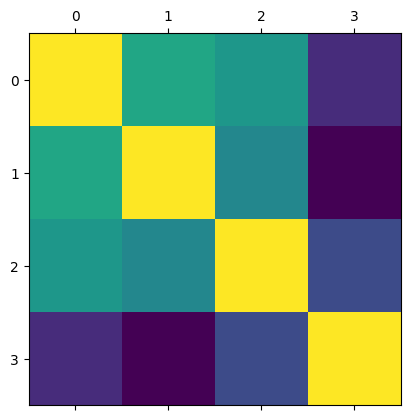

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(base.corr())
plt.show()

<ipython-input-8-2113d3ae67d4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(base.corr(), fignum=f.number)


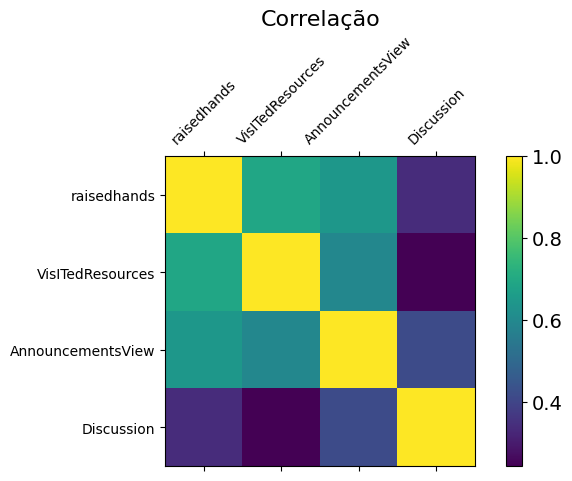

In [ ]:
f = plt.figure(figsize=(8,4))
plt.matshow(base.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlação', fontsize=16);

##**Limpeza e Formatação da Base**

###Visualizar e verificar dados Nulos e Duplicados

In [ ]:
base.Topic.value_counts() #contagem de frequência por valor

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

In [ ]:
base.isnull().sum() #verificar os nulos

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [ ]:
for i in base.duplicated(): #verificar se há duplicados
    if i:
      print(i)


True
True


In [ ]:
base = base.drop_duplicates() #remover duplicado

In [ ]:
for i in enumerate(base.duplicated()):
    if i[1]:
        print(i)

###Analisando a base e reduzindo-a

---



In [ ]:
basenumerica = base #base.iloc[56:96, : ] #Criei uma nova base que recebe aproximadamente 10% da base original
basenumerica

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [ ]:
base.iloc[325:329, : ] #código que apresenta a tabela reduzida FORMATO: base.iloc[ linha_i : linha_f , coluna_i : coluna_f]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
325,M,Syria,Syria,lowerlevel,G-02,A,French,S,Father,27,20,33,35,No,Bad,Under-7,M
328,F,Jordan,Palestine,lowerlevel,G-02,A,French,F,Mum,80,77,63,83,Yes,Good,Under-7,M
329,F,Jordan,Palestine,lowerlevel,G-02,A,French,S,Mum,75,85,73,80,Yes,Good,Under-7,M
330,M,Jordan,Jordan,lowerlevel,G-02,A,French,F,Father,40,7,50,41,No,Good,Above-7,L


In [ ]:
basenumerica.Semester.value_counts() #Verificar quais os valores de uma coluna e a frequencia de cada um

F    244
S    234
Name: Semester, dtype: int64

In [ ]:
basenumerica.iloc[:,-1].value_counts() #Para saber a quantidade total de classes da base

M    211
H    142
L    125
Name: Class, dtype: int64

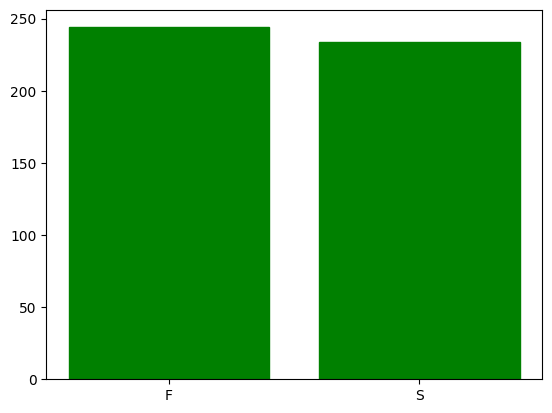

In [ ]:
import matplotlib.pyplot as plt #Código para criar o grafico de barras da minha base de dados
barlist = plt.bar(basenumerica.Semester.value_counts().index, basenumerica.Semester.value_counts().values, );
barlist[0].set_color('g')
barlist[1].set_color('g')

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    478 non-null    object
 1   NationalITy               478 non-null    object
 2   PlaceofBirth              478 non-null    object
 3   StageID                   478 non-null    object
 4   GradeID                   478 non-null    object
 5   SectionID                 478 non-null    object
 6   Topic                     478 non-null    object
 7   Semester                  478 non-null    object
 8   Relation                  478 non-null    object
 9   raisedhands               478 non-null    int64 
 10  VisITedResources          478 non-null    int64 
 11  AnnouncementsView         478 non-null    int64 
 12  Discussion                478 non-null    int64 
 13  ParentAnsweringSurvey     478 non-null    object
 14  ParentschoolSatisfaction  

### Binarizando colunas que só possuem dois valores

In [ ]:
label_enconder = LabelEncoder() #Função importada

In [ ]:
labels = label_enconder.fit_transform(basenumerica.gender) #cria uma coluna númerica baseada na coluna de strings da base
#labels #(Imprime a coluna formada para conferencia)
basenumerica['gender'] = labels #a coluna equivalente passa a receber a coluna númerica gerada

<ipython-input-21-63282f3b8244>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basenumerica['gender'] = labels #a coluna equivalente passa a receber a coluna númerica gerada


In [ ]:
labels = label_enconder.fit_transform(basenumerica.SectionID)
basenumerica['SectionID'] = labels

<ipython-input-22-c2c0f468a9ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basenumerica['SectionID'] = labels


In [ ]:
labels = label_enconder.fit_transform(basenumerica.Semester)
basenumerica['Semester'] = labels

<ipython-input-23-835b902d4b59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basenumerica['Semester'] = labels


In [ ]:
labels = label_enconder.fit_transform(basenumerica.Relation)
basenumerica['Relation'] = labels

<ipython-input-24-22a2b449a884>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basenumerica['Relation'] = labels


In [ ]:
labels = label_enconder.fit_transform(basenumerica.ParentAnsweringSurvey)
basenumerica['ParentAnsweringSurvey'] = labels

<ipython-input-25-d7049e41f1bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basenumerica['ParentAnsweringSurvey'] = labels


In [ ]:
labels = label_enconder.fit_transform(basenumerica.ParentschoolSatisfaction)
basenumerica['ParentschoolSatisfaction'] = labels

<ipython-input-26-c9a643b647c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basenumerica['ParentschoolSatisfaction'] = labels


In [ ]:
labels = label_enconder.fit_transform(basenumerica.StudentAbsenceDays)
basenumerica['StudentAbsenceDays'] = labels

<ipython-input-27-17398a26e267>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basenumerica['StudentAbsenceDays'] = labels


In [ ]:
labels = label_enconder.fit_transform(basenumerica.NationalITy)
basenumerica['NationalITy'] = labels

<ipython-input-28-7929159f36ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basenumerica['NationalITy'] = labels


In [ ]:
labels = label_enconder.fit_transform(basenumerica.PlaceofBirth)
basenumerica['PlaceofBirth'] = labels

<ipython-input-29-8d2ac9a43322>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basenumerica['PlaceofBirth'] = labels


In [ ]:
labels = label_enconder.fit_transform(basenumerica.StageID)
basenumerica['StageID'] = labels

<ipython-input-30-e7c1de7b0a39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basenumerica['StageID'] = labels


In [ ]:
labels = label_enconder.fit_transform(basenumerica.GradeID)
basenumerica['GradeID'] = labels

<ipython-input-31-9c8cacf1bcc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basenumerica['GradeID'] = labels


In [ ]:
labels = label_enconder.fit_transform(basenumerica.Topic)
basenumerica['Topic'] = labels

<ipython-input-32-72ae50a4d24c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basenumerica['Topic'] = labels


In [ ]:
labels = label_enconder.fit_transform(basenumerica.Class)
basenumerica['Class'] = labels

<ipython-input-33-cf9d76157342>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basenumerica['Class'] = labels


In [ ]:
base

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,3,3,1,5,0,2,1,0,5,4,5,8,0,0,0,1
476,0,3,3,1,5,0,5,0,0,50,77,14,28,0,0,1,2
477,0,3,3,1,5,0,5,1,0,55,74,25,29,0,0,1,2
478,0,3,3,1,5,0,6,0,0,30,17,14,57,0,0,0,1


###Dummies (Formando colunas com mais de dois valores)

In [ ]:
#basenumerica = pd.DataFrame(pd.get_dummies(basenumerica, columns=["NationalITy"]))

In [ ]:
#basenumerica = pd.DataFrame(pd.get_dummies(basenumerica, columns=["PlaceofBirth"]))

In [ ]:
#basenumerica = pd.DataFrame(pd.get_dummies(basenumerica, columns=["StageID"]))

In [ ]:
#basenumerica = pd.DataFrame(pd.get_dummies(basenumerica, columns=["GradeID"]))

In [ ]:
#basenumerica = pd.DataFrame(pd.get_dummies(basenumerica, columns=["Topic"]))

###Base númerica resultante

In [ ]:
basenumerica

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,3,3,1,5,0,2,1,0,5,4,5,8,0,0,0,1
476,0,3,3,1,5,0,5,0,0,50,77,14,28,0,0,1,2
477,0,3,3,1,5,0,5,1,0,55,74,25,29,0,0,1,2
478,0,3,3,1,5,0,6,0,0,30,17,14,57,0,0,0,1


In [ ]:
basenumerica.gender.value_counts()

1    303
0    175
Name: gender, dtype: int64

In [ ]:
basenumerica.info() #ver todas as colunas da sua base, assim como a quantidade de dados não nulos e a tipagem dos dados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   gender                    478 non-null    int64
 1   NationalITy               478 non-null    int64
 2   PlaceofBirth              478 non-null    int64
 3   StageID                   478 non-null    int64
 4   GradeID                   478 non-null    int64
 5   SectionID                 478 non-null    int64
 6   Topic                     478 non-null    int64
 7   Semester                  478 non-null    int64
 8   Relation                  478 non-null    int64
 9   raisedhands               478 non-null    int64
 10  VisITedResources          478 non-null    int64
 11  AnnouncementsView         478 non-null    int64
 12  Discussion                478 non-null    int64
 13  ParentAnsweringSurvey     478 non-null    int64
 14  ParentschoolSatisfaction  478 non-null    

In [ ]:
base = pd.DataFrame(pd.get_dummies(base, columns=["Topic"])) #Para formatar colunas com mais de dois valores

In [ ]:
base.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Semester,Relation,raisedhands,VisITedResources,...,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11
0,1,4,4,2,1,0,0,0,15,16,...,0,0,0,0,0,1,0,0,0,0
1,1,4,4,2,1,0,0,0,20,20,...,0,0,0,0,0,1,0,0,0,0
2,1,4,4,2,1,0,0,0,10,7,...,0,0,0,0,0,1,0,0,0,0
3,1,4,4,2,1,0,0,0,30,25,...,0,0,0,0,0,1,0,0,0,0
4,1,4,4,2,1,0,0,0,40,50,...,0,0,0,0,0,1,0,0,0,0


##Dividindo a base entre treino e teste

In [ ]:
#Dividindo a base em variaveis independentes e variaveis dependentes
#independentes = ['gender','SectionID','Semester','Relation','raisedhands','VisITedResources','AnnouncementsView','Discussion','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays','NationalITy_Iran','NationalITy_Jordan','NationalITy_KW','NationalITy_SaudiArabia','NationalITy_USA','NationalITy_lebanon','NationalITy_venzuela','PlaceofBirth_Iran','PlaceofBirth_Jordan','PlaceofBirth_KuwaIT','PlaceofBirth_SaudiArabia','PlaceofBirth_USA','PlaceofBirth_lebanon','PlaceofBirth_venzuela','StageID_HighSchool','StageID_MiddleSchool','StageID_lowerlevel','GradeID_G-02','GradeID_G-05','GradeID_G-07','GradeID_G-08','GradeID_G-09','GradeID_G-10','GradeID_G-11','GradeID_G-12','Topic_English','Topic_IT','Topic_Math','Topic_Quran']
independentes = ['gender','NationalITy','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester','Relation','raisedhands','VisITedResources','AnnouncementsView','Discussion','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays']
x = basenumerica[independentes]
y = basenumerica.Class

In [ ]:
#Dividindo a base entre traino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) #random_state permite que não embaralhe

SMOT

In [ ]:
pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smt = SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)

In [ ]:
basenumerica.Class.value_counts()

2    211
0    142
1    125
Name: Class, dtype: int64

#**Decision Tree**

In [ ]:
#Criando o objeto de classificação da árvore de decisão
clf = DecisionTreeClassifier()

#treinando
clf = clf.fit(x_train, y_train)

#prevendo a resposta para os dados de teste
y_pred = clf.predict(x_test)

In [ ]:
#Para verificar se o classificador realizou a predição corretamente:
acuraciaDT = metrics.accuracy_score(y_test, y_pred)
print ("Accuracy:", acuraciaDT)

Accuracy: 0.7708333333333334


In [ ]:
#Metrica Kappa
kappaDT = metrics.cohen_kappa_score(y_test, y_pred)
kappaDT

0.6445774121166792

In [ ]:
f1DT = f1_score(y_pred, y_test, average="weighted")
print (f1DT)

0.7710590277777778


In [ ]:
#Matriz de confusão
arrayDT = metrics.confusion_matrix(y_test, y_pred)
arrayDT

array([[39,  1, 11],
       [ 0, 26,  5],
       [10,  6, 46]])

Text(45.722222222222214, 0.5, 'Real')

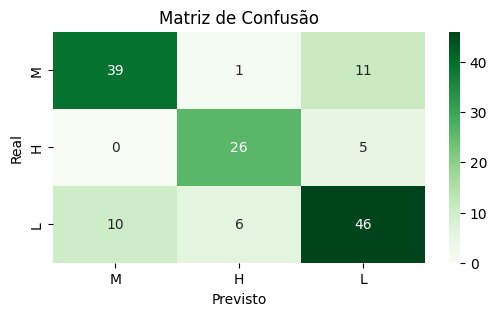

In [ ]:
df_cm = pd.DataFrame(arrayDT, index = [i for i in "MHL"],
                  columns = [i for i in "MHL"])
plt.figure(figsize = (6,3))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Greens')
plt.title("Matriz de Confusão")
plt.xlabel('Previsto')
plt.ylabel('Real')
#plt.savefig(path_to_save + '/confusion_matrix.sgv')

#**Random Forest**

###RF puro

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(x_test)

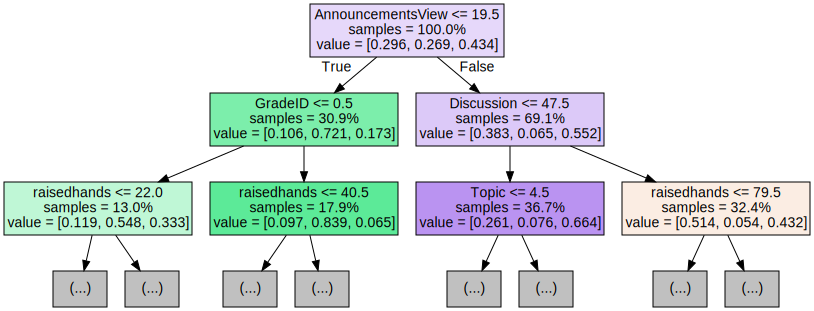

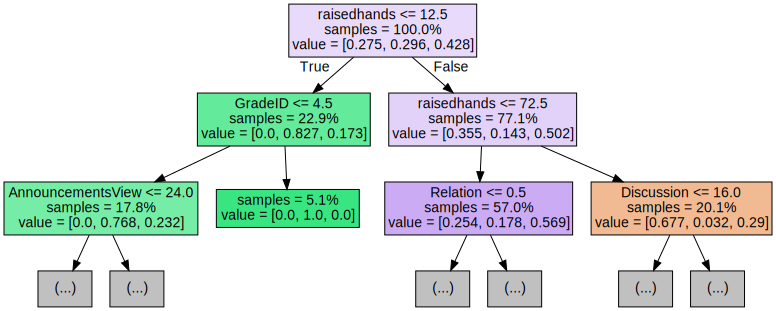

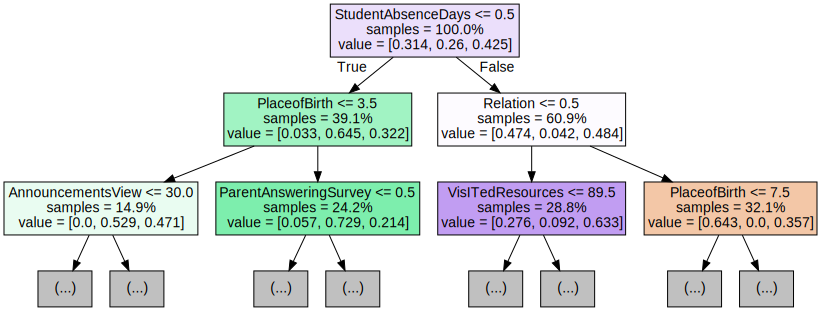

In [ ]:
# Apresenta as três primeiras árvores de decisão da floresta

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
acuraciaRF = metrics.accuracy_score(y_test, y_pred)
print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7708333333333334


In [ ]:
kappaRF = metrics.cohen_kappa_score(y_test, y_pred)
kappaRF

0.6420878210439105

###RF com hiperparâmetros

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
#Ajuste de hiperparâmetros

#n_estimators é o nº de árvores da floresta. Quanto mais, melhor a precisão
#max_depth é para definir a profundidade máxima de cada árvores
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# random_search é usado para encontrar os melhores atributos
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)
#random_search recebe a base
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f28531033a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f28530c2e90>})

In [ ]:
y_pred = rand_search.predict(x_test)

In [ ]:
acuraciaRF = metrics.accuracy_score(y_test, y_pred)
print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7777777777777778


In [ ]:
kappaRF = metrics.cohen_kappa_score(y_test, y_pred)
kappaRF

0.6526458616010855

In [ ]:
f1RF = f1_score(y_pred, y_test, average="weighted")
print (f1RF)

0.7772378843075565


Usando RndomizedSearchCV para imprimir os melhores hiperparâmetros

In [ ]:
best_rf = rand_search.best_estimator_

# Print os melhores hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 410}


#**Naive Bayes**

In [ ]:
#Criando um classificador Gaussian Naive Bayes
model = GaussianNB()
#Modelo de treino
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
acuraciaNB = metrics.accuracy_score(y_test, y_pred)
print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7569444444444444


In [ ]:
kappaNB = metrics.cohen_kappa_score(y_test, y_pred)
kappaRF

0.6526458616010855

In [ ]:
f1NB = f1_score(y_pred, y_test, average="weighted")
print (f1NB)

0.7616621208847438


#**SVM**



In [ ]:
#Criando o objeto de classificação do SVM
clf = svm.SVC(kernel='linear') # Linear Kernel

In [ ]:
#Train the model using the training sets
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
acuraciaSVM = metrics.accuracy_score(y_test, y_pred)
print ("Accuracy:", acuraciaSVM)

Accuracy: 0.7708333333333334


In [ ]:
#Metrica Kappa
kappaSVM = metrics.cohen_kappa_score(y_test, y_pred)

In [ ]:
f1SVM = f1_score(y_pred, y_test, average="weighted")
print (f1SVM)

0.7729848680320379


In [ ]:
#metrics.precision_score(y_test, y_pred) #Só serve para classes binárias?

In [ ]:
#metrics.recall_score(y_test, y_pred) #Só serve para classes binárias?

In [ ]:
arraySVM = metrics.confusion_matrix(y_test, y_pred)
arraySVM

array([[43,  0,  8],
       [ 0, 26,  5],
       [12,  8, 42]])

Text(45.722222222222214, 0.5, 'Real')

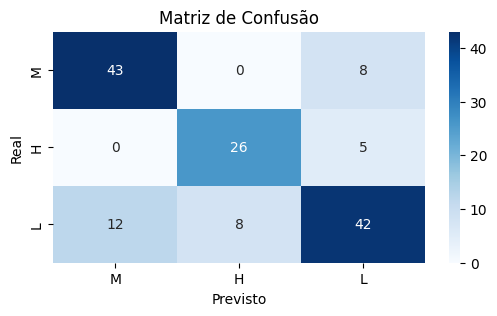

In [ ]:
df_cm = pd.DataFrame(arraySVM, index = [i for i in "MHL"],
                  columns = [i for i in "MHL"])
plt.figure(figsize = (6,3))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel('Previsto')
plt.ylabel('Real')
#plt.savefig(path_to_save + '/confusion_matrix.sgv')

#Resultados

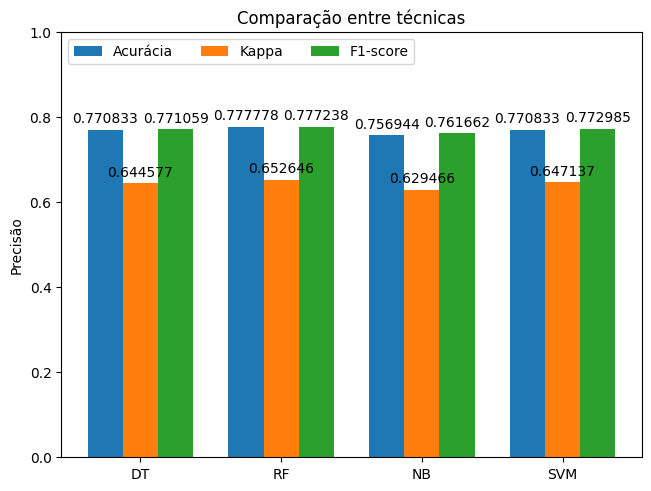

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


species = ("DT", "RF", "NB", "SVM")
penguin_means = {
    'Acurácia': (acuraciaDT, acuraciaRF, acuraciaNB, acuraciaSVM),
    'Kappa': (kappaDT, kappaRF, kappaNB, kappaSVM),
    'F1-score': (f1DT, f1RF, f1NB,f1SVM),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precisão')
ax.set_title('Comparação entre técnicas')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()